In [30]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import skimage

from skimage.feature import hog
from skimage.feature import canny
from skimage import data, exposure
from skimage.exposure import histogram
from skimage.feature import match_template
from skimage.transform import rescale
from skimage.util import random_noise
from scipy.signal import correlate2d
from skimage import io
from skimage.transform import resize

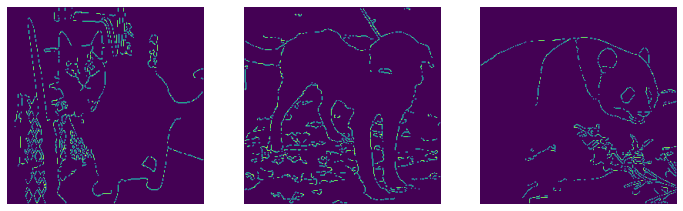

In [95]:
size = 256

sigma_value = 2
low_threshold_value = 0.1
high_threshold_value = 0.4

pixels_per_cell_value = 5

number_of_animals_to_compare = 10
animal_type = "cats/cats"
cats = [resize(canny(io.imread(f"animals/cats/cats_0000{idx}.jpg", as_gray=True), sigma=sigma_value, low_threshold=low_threshold_value, high_threshold=high_threshold_value), (size, size)) for idx in range(1,6)]
dogs = [resize(canny(io.imread(f"animals/dogs/dogs_0000{idx}.jpg", as_gray=True), sigma=sigma_value, low_threshold=low_threshold_value, high_threshold=high_threshold_value), (size, size)) for idx in range(1,6)]
pandas = [resize(canny(io.imread(f"animals/pandas/panda_0000{idx}.jpg", as_gray=True), sigma=sigma_value, low_threshold=low_threshold_value, high_threshold=high_threshold_value), (size, size)) for idx in range(1,6)]
images = cats + dogs + pandas

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes[0].imshow(cats[0]) and axes[0].axis('off')
axes[1].imshow(dogs[0]) and axes[1].axis('off')
axes[2].imshow(pandas[0]) and axes[2].axis('off')

plt.show()

In [96]:

cats_hog = [hog(img, orientations=8, pixels_per_cell=(pixels_per_cell_value, pixels_per_cell_value),
                    cells_per_block=(1, 1)) for img in cats]
dogs_hog = [hog(img, orientations=8, pixels_per_cell=(pixels_per_cell_value, pixels_per_cell_value),
                    cells_per_block=(1, 1)) for img in dogs]
pandas_hog = [hog(img, orientations=8, pixels_per_cell=(pixels_per_cell_value, pixels_per_cell_value),
                    cells_per_block=(1, 1)) for img in pandas]

# étiquettes (1 pour les vélos, 2 pour les voitures)
cats_labels = 1 * np.ones((len(cats_hog), ))
dogs_labels = 2 * np.ones((len(dogs_hog), ))
pandas_labels = 3 * np.ones((len(pandas_hog), ))

dataset = np.concatenate((cats_hog, dogs_hog, pandas_hog))
labels = np.concatenate((cats_labels, dogs_labels, pandas_labels)).astype("int")
print(labels.shape)

(15,)


In [97]:
query = [resize(canny(io.imread(f"animals/{animal_type}_0000{idx}.jpg", as_gray=True), sigma=sigma_value, low_threshold=low_threshold_value, high_threshold=high_threshold_value), (size, size)) for idx in range(1,number_of_animals_to_compare)]
hog_query = [hog(img, orientations=8, pixels_per_cell=(pixels_per_cell_value, pixels_per_cell_value), cells_per_block=(1, 1))for img in query]
plt.show()

In [98]:
for
scores = np.array([np.linalg.norm(hog_query - hog) for hog in dataset])

closest = np.argsort(scores)
print(closest)
fig, axes = plt.subplots(nrows=1, ncols=len(closest), figsize=(20, 8))
for idx, img_idx in enumerate(closest):
    axes[idx].imshow(images[img_idx]) and axes[idx].axis('off')

k = 5
closest_labels = labels[closest[:k]]
print(f"Étiquettes des {k} images les plus proches : {closest_labels}")
print(f"Étiquette majoritaire : {np.argmax(np.bincount(closest_labels))}")

ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

In [ ]:
#descriptor, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1))
#fig ()= plt.subplots(1, 2, figsize=(8, 4))
#ax1.axis('off')
#ax1.imshow(image, cmap="gray") and ax1.set_title("Image")
  
#Amélioration du contraste
#hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
#ax2.axis('off')
#ax2.imshow(hog_image, cmap="gray") and ax2.set_title("HOG")
#plt.show()